This version experiments with using matplot to plot buyer's payoff instead of opstrat.

In [1]:
pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


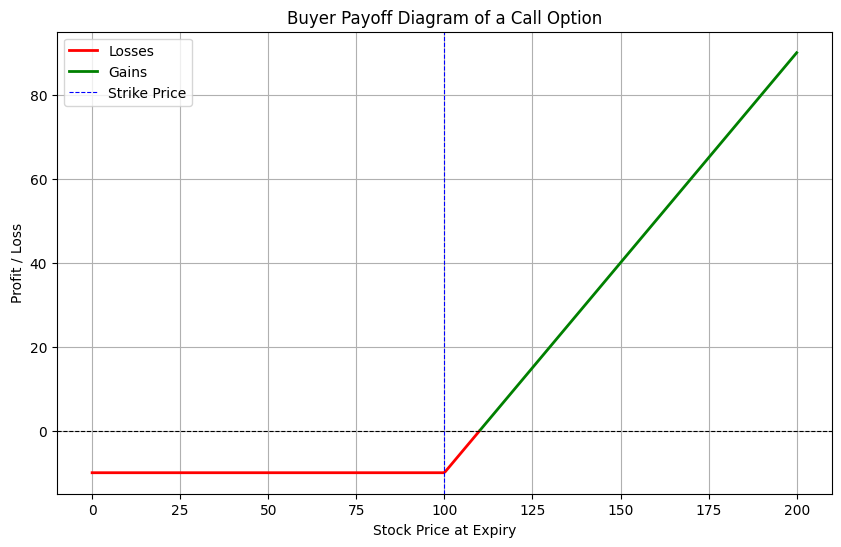

In [12]:
import matplotlib.pyplot as plt
import numpy as np

class Option:
    def __init__(self, option_type, strike_price, premium, position):
        if option_type not in ['call', 'put']:
            raise ValueError("Invalid option type. Choose 'call' or 'put'.")
        if position not in ['buyer', 'seller']:
            raise ValueError("Invalid position. Choose 'buyer' or 'seller'.")

        self.option_type = option_type
        self.strike_price = strike_price
        self.premium = premium
        self.position = position

    def calculate_payoff(self, stock_prices):
        if self.option_type == "call":
            payoff = np.maximum(stock_prices - self.strike_price, 0) - self.premium
        elif self.option_type == "put":
            payoff = np.maximum(self.strike_price - stock_prices, 0) - self.premium

        if self.position == "seller":
            payoff = -payoff  
        return payoff


class OptionPayoffVisualizer:
    @staticmethod
    def visualize(option):
        stock_prices = np.linspace(0, option.strike_price * 2, 500)
        
        # Calculate payoff
        payoff = option.calculate_payoff(stock_prices)
        
        # Separate gains and losses for coloring
        losses = np.where(payoff < 0, payoff, np.nan)
        gains = np.where(payoff >= 0, payoff, np.nan)
        
        # Plot the payoff graph
        plt.figure(figsize=(10, 6))
        plt.plot(stock_prices, losses, label="Losses", color='red', linewidth=2)
        plt.plot(stock_prices, gains, label="Gains", color='green', linewidth=2)
        plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
        plt.axvline(option.strike_price, color='blue', linewidth=0.8, linestyle='--', label="Strike Price")
        plt.title(f"{option.position.capitalize()} Payoff Diagram of a {option.option_type.capitalize()} Option")
        plt.xlabel("Stock Price at Expiry")
        plt.ylabel("Profit / Loss")
        plt.legend()
        plt.grid()
        plt.show()


if __name__ == "__main__":
    # Define the option parameters
    option = Option(option_type="call", strike_price=100, premium=10, position="buyer")
    # Visualize the option payoff
    OptionPayoffVisualizer.visualize(option)
